In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [29]:
def build_cnn(input_shape=(224, 224, 3), num_classes=10):
    """Defines a CNN model with the specified 
    input shape and number of classes."""
    model = Sequential()
    model.add(Conv2D(32, (3, 3),activation='relu', 
                   input_shape=input_shape))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [30]:
model = build_cnn()

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dense_1 (Dense)             (None, 10)               

#### Create the object of Image Data Generator

In [32]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [33]:
test_datagen = ImageDataGenerator(rescale=1/255)

#### Read the images

In [34]:
train_dataset = train_datagen.flow_from_directory(
    '/media/mitu/data/datasets/imagenet/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 5000 images belonging to 10 classes.


In [35]:
test_dataset = test_datagen.flow_from_directory(
    '/media/mitu/data/datasets/imagenet/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 10000 images belonging to 1 classes.


In [36]:
train_dataset.class_indices

{'crocodile': 0,
 'fish': 1,
 'fossils': 2,
 'frog': 3,
 'insect': 4,
 'reptiles': 5,
 'scorpion': 6,
 'snake': 7,
 'spider': 8,
 'toad': 9}

In [37]:
train_dataset.filenames

['crocodile/images/n01698640_0.JPEG',
 'crocodile/images/n01698640_1.JPEG',
 'crocodile/images/n01698640_10.JPEG',
 'crocodile/images/n01698640_100.JPEG',
 'crocodile/images/n01698640_101.JPEG',
 'crocodile/images/n01698640_102.JPEG',
 'crocodile/images/n01698640_103.JPEG',
 'crocodile/images/n01698640_104.JPEG',
 'crocodile/images/n01698640_105.JPEG',
 'crocodile/images/n01698640_106.JPEG',
 'crocodile/images/n01698640_107.JPEG',
 'crocodile/images/n01698640_108.JPEG',
 'crocodile/images/n01698640_109.JPEG',
 'crocodile/images/n01698640_11.JPEG',
 'crocodile/images/n01698640_110.JPEG',
 'crocodile/images/n01698640_111.JPEG',
 'crocodile/images/n01698640_112.JPEG',
 'crocodile/images/n01698640_113.JPEG',
 'crocodile/images/n01698640_114.JPEG',
 'crocodile/images/n01698640_115.JPEG',
 'crocodile/images/n01698640_116.JPEG',
 'crocodile/images/n01698640_117.JPEG',
 'crocodile/images/n01698640_118.JPEG',
 'crocodile/images/n01698640_119.JPEG',
 'crocodile/images/n01698640_12.JPEG',
 'croco

In [38]:
import matplotlib.pyplot as plt

In [40]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [56]:
model.fit(train_dataset, epochs=2)

Epoch 1/2
157/157 [==============================] - 263s 2s/step - loss: 1.2057 - accuracy: 0.5936
Epoch 2/2
157/157 [==============================] - 227s 1s/step - loss: 1.1645 - accuracy: 0.6100


In [57]:
import matplotlib.pyplot as plt

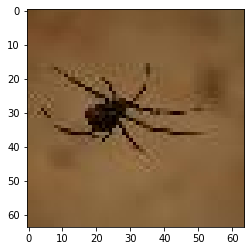

In [58]:
new = plt.imread('/media/mitu/data/datasets/imagenet/val/images/val_192.JPEG')
plt.imshow(new)

In [98]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/media/mitu/data/datasets/imagenet/val/images/val_205.JPEG', 
                            target_size = (224, 224))

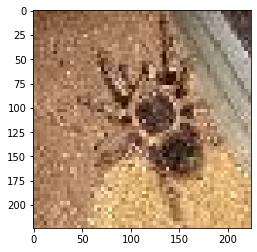

In [99]:
plt.imshow(test_image);

In [100]:
test_image = image.img_to_array(test_image)

In [101]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 224, 224, 3)

In [102]:
np.argmax(model.predict(test_image))

1/1 [==============================] - 0s 44ms/step


6

In [103]:
labels = train_dataset.class_indices

In [94]:
labels

{'crocodile': 0,
 'fish': 1,
 'fossils': 2,
 'frog': 3,
 'insect': 4,
 'reptiles': 5,
 'scorpion': 6,
 'snake': 7,
 'spider': 8,
 'toad': 9}